In [2]:
from __future__ import print_function
from brian2.units import *

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import bz2
from scipy.misc import imsave, imrotate



In [4]:
imgw = imgh = 64
fps = 200. / second
tpf = np.floor((1. * ms) / fps)
oversize = 1.5
bar = np.zeros((int(imgh * oversize), int(imgw * oversize)))
maxw = bar.shape[0]
frame = np.zeros((imgh, imgw))
padd = (bar.shape[0] - frame.shape[0])//2
width = 3
height = 3
angle = 0.
cycles = .41 * second

print(imgw, imgh)
print(bar.shape)
print("fps",fps)
print(tpf)
print(padd)
print("cycles", cycles)

dirname = "moving_bar_res_%dx%d__w_%d__angle_%03d__fps_%d__cycles_%.2fs"%\
            (imgw, imgh, width, angle, fps, cycles)
print(dirname)

64 64
(96L, 96L)
fps 200. Hz
0. s^2
16
cycles 0.41 s
moving_bar_res_64x64__w_3__angle_000__fps_200__cycles_0.41s


In [5]:
%%capture
def generate_raw_pngs(dirname, fps, cycles,angle, plot=False):
    if not os.path.exists(dirname):
        os.mkdir(dirname)

    t = 0.
    m = 0.
    fidx = 45
    frames = int(fps*cycles)
    fw = 1.
    cols = 10
    rows = frames // cols + int((frames % cols) > 0)

    fr = 0
    op_add = True

    # angle = 0.
    thresh = 100.
    if plot:
        fig = plt.figure(figsize=(cols * fw, rows * fw))

    y = padd if angle%90 == 0 else padd//2
    
    for i in range(frames):
        if fr == 0:
            op_add = True
        elif fr == fidx:
            op_add = False

        m = float(fr)/float(maxw)    

    #     print(m, i, frames)
        
    #     x = ((-(cycles * m * maxw) + np.arange(maxw) )**2) / (2. * np.pi * 5.)
    #     x = ((-(2. * m * maxw) + np.arange(maxw) )**2) / (2. * np.pi * 5.)
    #     bar[0, :] = np.exp(-x)
        if y >= bar.shape[0]:
            y = padd 
        bar[:] = 0
        bar[:, y] = 255.
        for c in range(max(0, y-1), max(0, y-height), -1):
            bar[:, c] = bar[:, y]
        y += 1
        bar[:] = imrotate(bar, angle)
        frame[:] = bar[padd:frame.shape[0]+padd, padd:frame.shape[1]+padd]
        frame[frame>thresh] = 255.
        frame[frame<=thresh] = 0.

        if plot:
            ax = plt.subplot(rows, cols, i+1)
            plt.imshow(frame.copy(), cmap='Greys_r', interpolation='none')
            ax.set_title("%d, %3.2f"%(fr, t))
            ax.set_xticks([])
            ax.set_yticks([])
            plt.margins(0.05, 0.05)
        
        t += tpf
        if op_add:
            fr += 1
        else:
            fr -= 1
            
        imsave("./%s/bar_%06d.png"%(dirname, i), frame)
    if plot:
        plt.show()
        plt.close(fig)
    

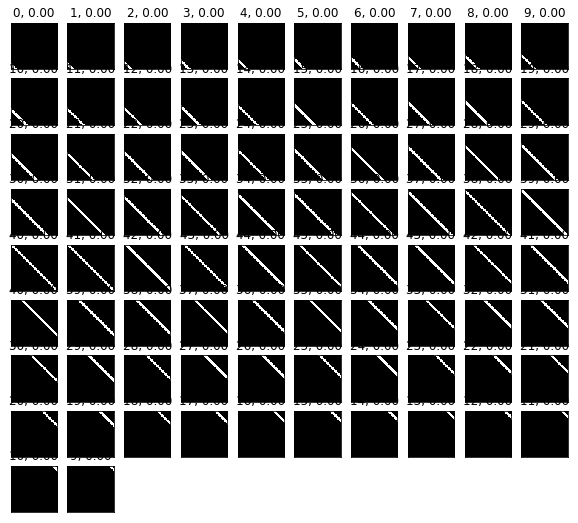

In [6]:
generate_raw_pngs(dirname, fps, cycles, 45, True)

In [14]:
out_base = "raw_moving_bar_pngs"
if not os.path.exists(out_base):
    os.mkdir(out_base)

for angle in np.arange(0, 360, 5):
    imgw = imgh = 64
    fps = 200. / second
    tpf = np.floor(1000. / fps)
    bar = np.zeros((int(imgh * 1.5), int(imgw * 1.5)))
    maxw = bar.shape[0]
    frame = np.zeros((imgh, imgw))
    padd = (bar.shape[0] - frame.shape[0])//2
    width = 3
    cycles = .4 * second

#     print(imgw, imgh)
#     print(bar.shape)
#     print("fps",fps)
#     print(tpf)
#     print(padd)
    
    
    dirname = "moving_bar_res_%dx%d__w_%d__angle_%03d__fps_%d__cycles_%.2fs"%\
                (imgw, imgh, width, angle, fps, cycles)
    print(dirname)
    out_dir = os.path.join(out_base, dirname)
    generate_raw_pngs(out_dir, fps, cycles, angle)
    

moving_bar_res_64x64__w_3__angle_000__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_005__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_010__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_015__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_020__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_025__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_030__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_035__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_040__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_045__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_050__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_055__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_060__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_065__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_070__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_075__fps_200__cycles_0.40s
moving_bar_res_64x64__w_3__angle_080__fp